# Methodik

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
diabetes = pd.read_csv("diabetes.csv")

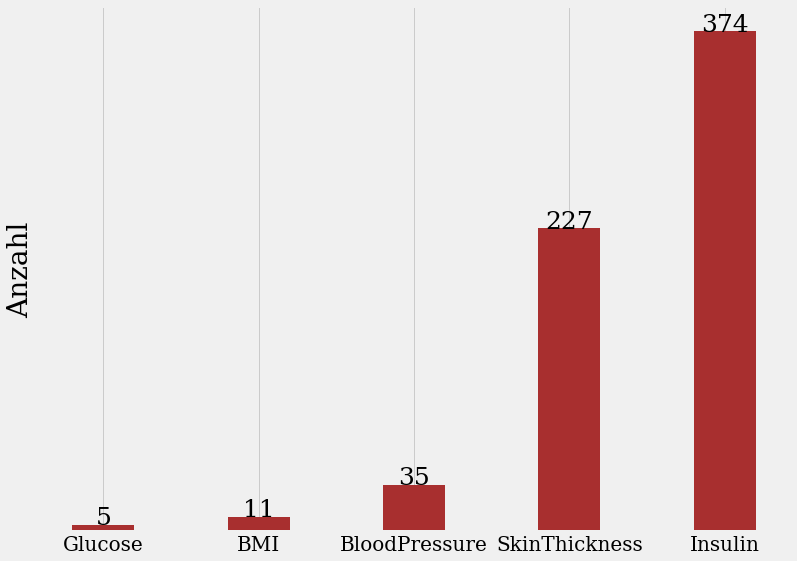

In [6]:
glnullwerte = diabetes.Glucose.value_counts().loc[0]

bpnullwerte = diabetes.BloodPressure.value_counts().loc[0]

stnullwerte = diabetes.SkinThickness.value_counts().loc[0]

innullwerte = diabetes.Insulin.value_counts().loc[0]

bminullwerte = diabetes.BMI.value_counts().loc[0]

nullwerte = [glnullwerte,bminullwerte, bpnullwerte, stnullwerte, innullwerte]
labels = ["Glucose","BMI","BloodPressure", "SkinThickness", "Insulin"]


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', fontfamily="serif", fontsize= 25)


with plt.style.context('fivethirtyeight'):
    plt.figure(figsize = (12, 9))
    plt.bar(labels, nullwerte, color= "#a82f2f", width=0.4)
    addlabels(labels, nullwerte)
    plt.xticks(family = "serif", fontsize=20)
    plt.yticks([])
    plt.ylabel("Anzahl", fontsize = 28, family="serif",)
    plt.show()

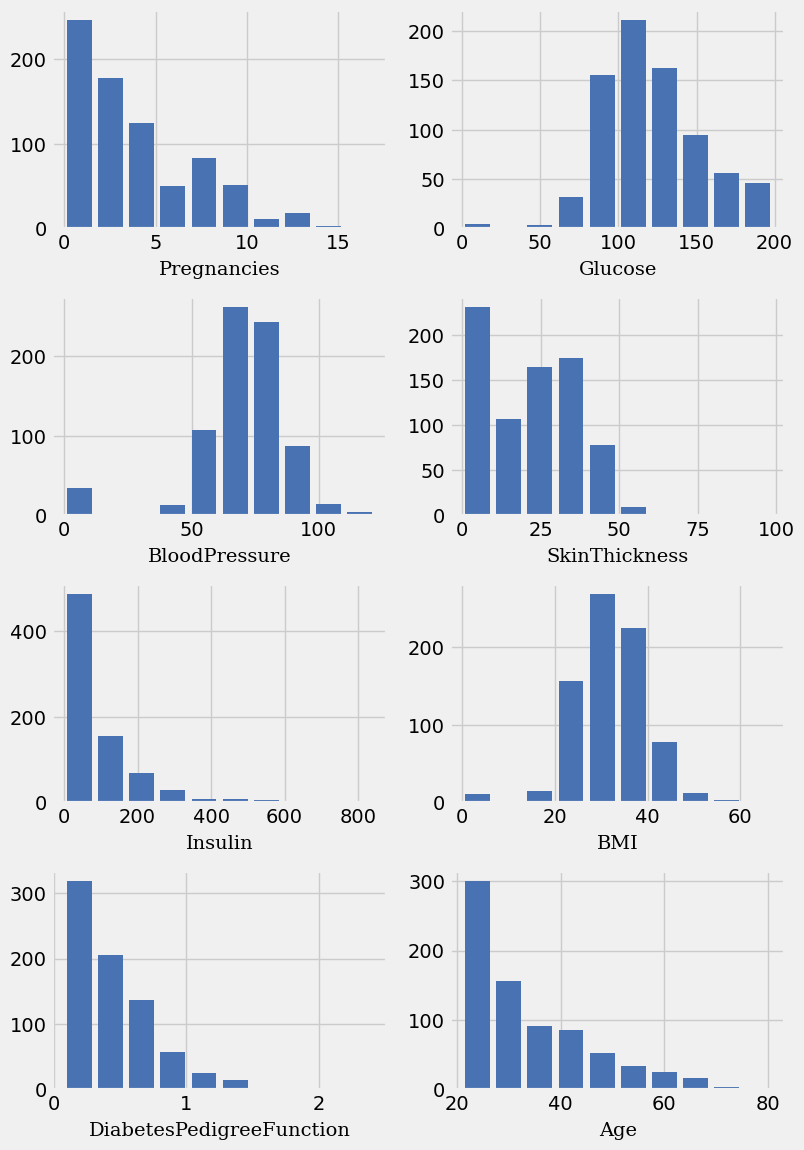

In [7]:
#Code für Abbildung 1


data = diabetes.drop(columns ="Outcome")

with plt.style.context('fivethirtyeight'):
    fig, axes = plt.subplots(4, 2, figsize=(8.27, 11.69,), dpi=100)
    for i, ax in enumerate(axes.flat):
        ax.hist(data.iloc[:, i], rwidth=0.8, color="#4972b3")
        ax.set_title(data.columns[i], fontsize = 14, family="serif", y=-0.25)
    plt.tight_layout()
    plt.show()
#plt.savefig('variablen_histogramm.png')     

### Imputation von fehlenden Werten

In [8]:
null_unzulaessig = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

Nullwerte unzulässig, da logisch nicht möglich

In [9]:
nullwerte_dict = {}
for column in null_unzulaessig:
    null_count = diabetes[diabetes[column]==0].count()[0]
    nullwerte_dict[column] = null_count
print(nullwerte_dict)


{'Glucose': 5, 'BloodPressure': 35, 'SkinThickness': 227, 'Insulin': 374, 'BMI': 11}


Nullwerte durch np.NaN ersetzen, dadurch leichtere Handhabung im Code.

In [10]:
diabetes[null_unzulaessig] = diabetes[null_unzulaessig].replace(0, np.NaN)

Median-Werte teilweise stark unterschiedlich je nach Outcome-Wert. Daher bei Imputation der fehlenden Werte Median-Wert der entsprechenden Kategorie nehmen.

Folgende Tabelle zeigt alle Medianwerte:

In [12]:
diabetes.groupby("Outcome").median()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2,107.0,70.0,27.0,102.5,30.1,0.336,27
1,4,140.0,74.5,32.0,169.5,34.3,0.449,36


Manuelle Imputieren der fehlenden Werte für alle Spalten:

Glucose:

In [13]:
diabetes.loc[(diabetes['Outcome'] == 0 ) & (diabetes['Glucose'].isnull()), 'Glucose'] = 107.0
diabetes.loc[(diabetes['Outcome'] == 1 ) & (diabetes['Glucose'].isnull()), 'Glucose'] = 140.0

BloodPressure:

In [14]:
diabetes.loc[(diabetes['Outcome'] == 0 ) & (diabetes['BloodPressure'].isnull()), 'BloodPressure'] = 70.0
diabetes.loc[(diabetes['Outcome'] == 1 ) & (diabetes['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

SkinThickness:

In [15]:
diabetes.loc[(diabetes['Outcome'] == 0 ) & (diabetes['SkinThickness'].isnull()), 'SkinThickness'] = 27.0
diabetes.loc[(diabetes['Outcome'] == 1 ) & (diabetes['SkinThickness'].isnull()), 'SkinThickness'] = 32.0

Insulin:

In [16]:
diabetes.loc[(diabetes['Outcome'] == 0 ) & (diabetes['Insulin'].isnull()), 'Insulin'] = 102.5
diabetes.loc[(diabetes['Outcome'] == 1 ) & (diabetes['Insulin'].isnull()), 'Insulin'] = 169.5

BMI:

In [17]:
diabetes.loc[(diabetes['Outcome'] == 0 ) & (diabetes['BMI'].isnull()), 'BMI'] = 30.1
diabetes.loc[(diabetes['Outcome'] == 1 ) & (diabetes['BMI'].isnull()), 'BMI'] = 34.3

In [18]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,32.0,169.5,34.3,0.232,54,1


Code für Abbildung 2

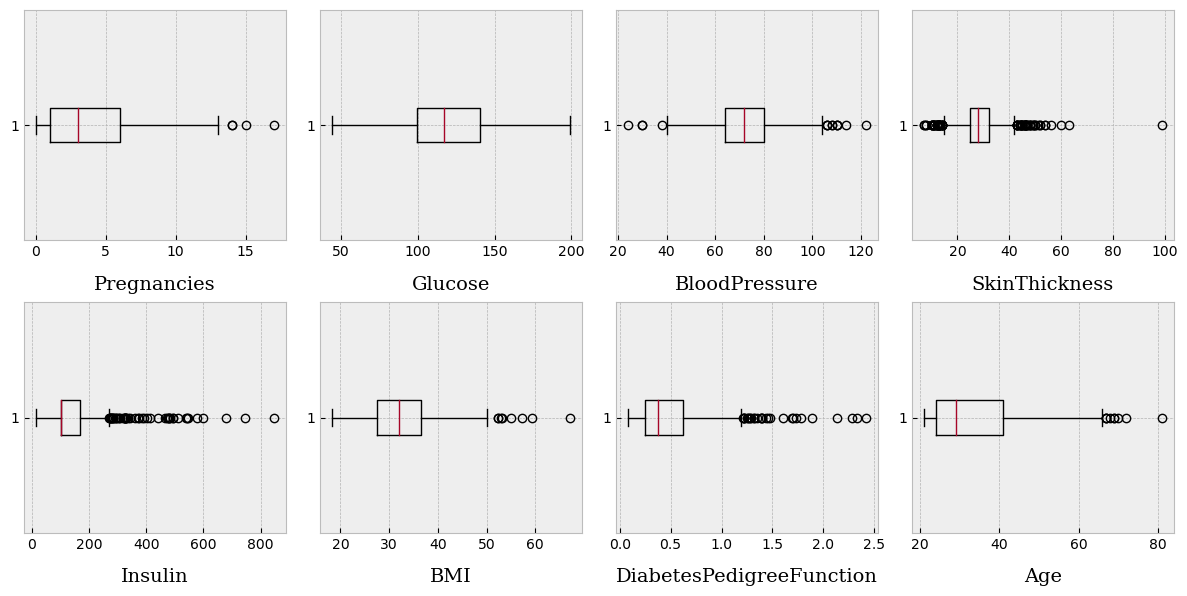

In [20]:
data = diabetes.drop(columns ="Outcome")

with plt.style.context('bmh'):
    fig, axes = plt.subplots(2, 4, figsize=(12, 6,), dpi=100)
    for i, ax in enumerate(axes.flat):
        ax.boxplot(data.iloc[:, i], vert = False)
        ax.set_title(data.columns[i], fontsize = 14, family="serif", y=-0.25)
    plt.tight_layout()
    plt.show()


### Ausreißererkennung mithilfe der IQR

In [21]:
def remove_outlier_in_column(dataframe, column):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower_limit  = q1-4*iqr
    upper_limit = q3+4*iqr
    dataframe_new = dataframe.loc[(dataframe[column] > lower_limit) & (dataframe[column] < upper_limit)]
    return dataframe_new

In [22]:
for column in diabetes:
    diabetes = remove_outlier_in_column(diabetes, column)

In [23]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,3.880697,120.441019,72.382038,28.742627,132.073056,32.252681,0.461480,33.184987,0.339142
std,3.379445,29.740983,12.082275,8.309175,61.524615,6.780879,0.305424,11.696869,0.473736
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,102.500000,27.400000,0.243250,24.000000,0.000000
50%,3.000000,116.000000,72.000000,27.500000,102.500000,32.000000,0.367000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,169.500000,36.300000,0.612750,40.750000,1.000000
max,17.000000,199.000000,122.000000,56.000000,415.000000,67.100000,1.893000,81.000000,1.000000


### Keine Standardisierung oder Skalierung

da kein Einfluss auf Training von Random Forests und Gradient Boosted Trees.

In [24]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0


## Modellaufbau

### Trainings und Testsplit

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
y = diabetes["Outcome"]
X = diabetes.drop(columns ="Outcome")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
101,1,151.0,60.0,27.0,102.5,26.1,0.179,22
630,7,114.0,64.0,32.0,169.5,27.4,0.732,34
564,0,91.0,80.0,27.0,102.5,32.4,0.601,27
527,3,116.0,74.0,15.0,105.0,26.3,0.107,24
338,9,152.0,78.0,34.0,171.0,34.2,0.893,33
...,...,...,...,...,...,...,...,...
728,2,175.0,88.0,27.0,102.5,22.9,0.326,22
199,4,148.0,60.0,27.0,318.0,30.9,0.150,29
648,11,136.0,84.0,35.0,130.0,28.3,0.260,42
575,1,119.0,44.0,47.0,63.0,35.5,0.280,25


### Modellinstandsetzung

#### Random Forest:

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

#### Gradient Boosted Tree:

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

<b>Hyperparamter Tuning mit GridSearchCV</b>

Random Forest:

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid_rfc = {
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 4, 8,],
    'max_features': ['sqrt', None, 6],
    'n_estimators': [50, 100, 400, 800],
    'max_samples':[None, int(X_train.shape[0]/2)],
    'random_state':[5]
}
GSRF = GridSearchCV(estimator = rfc, 
                           param_grid = param_grid_rfc, 
                           cv = 5, 
                           verbose = 2)


Gradient Boosting Trees

In [30]:
param_grid_gbc = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 400] ,
    'min_samples_split': [ 2, 4, 8], 
    'min_samples_leaf': [1, 4, 8],
    'random_state':[5]
}
GSGB = GridSearchCV(estimator = gbc, 
                           param_grid = param_grid_gbc, 
                           cv = 5, 
                           verbose = 2)


In [31]:
rfc_eval = RandomForestClassifier(min_samples_split =4,
    min_samples_leaf = 1,
    max_features = 'sqrt',
    n_estimators = 50,
    max_samples = None,
    random_state = 5)
rfc_eval.fit(X_train, y_train)
y_predicted_rfc = rfc_eval.predict(X_test)
y_predicted_score_rfc =  rfc_eval.predict_proba(X_test)[:,1]

In [32]:
gbc_eval = GradientBoostingClassifier(learning_rate = 0.05, 
                                      min_samples_leaf = 8,
                                      min_samples_split = 2,
                                      n_estimators = 50,
                                      random_state = 5)
gbc_eval.fit(X_train, y_train)
y_predicted_gbc = gbc_eval.predict(X_test)
y_predicted_score_gbc = gbc_eval.predict_proba(X_test)[:,1]

### Modellevaluation

In [33]:
from sklearn.metrics import accuracy_score
rfc_accuracy = accuracy_score(y_test, y_predicted_rfc)
gbc_accuracy = accuracy_score(y_test, y_predicted_gbc)
print(accuracy_score(y_test, y_predicted_rfc), accuracy_score(y_test, y_predicted_gbc))
y_test.value_counts()

0.9066666666666666 0.9066666666666666


0    110
1     40
Name: Outcome, dtype: int64

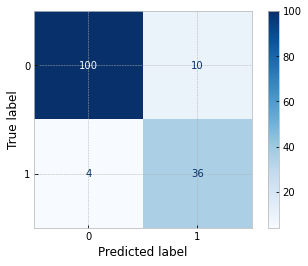

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
with plt.style.context('bmh'):
    km_rfc = confusion_matrix(y_test, y_predicted_rfc, labels=rfc_eval.classes_)
    display_rfc = ConfusionMatrixDisplay(confusion_matrix=km_rfc,
                              display_labels=rfc_eval.classes_)
    display_rfc.plot(cmap=plt.cm.Blues)
    plt.show()

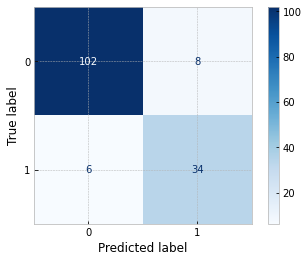

In [35]:
with plt.style.context('bmh'):
    km_gbc = confusion_matrix(y_test, y_predicted_gbc, labels=gbc_eval.classes_)
    display_gbc = ConfusionMatrixDisplay(confusion_matrix=km_gbc,
                              display_labels=gbc_eval.classes_)
    display_gbc.plot(cmap=plt.cm.Blues)
    plt.show()

Sensitivität / recall

In [36]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_predicted_rfc), recall_score(y_test, y_predicted_gbc))

0.9 0.85


Spezifität

In [37]:
print(100 / 110, 102 / 110)

0.9090909090909091 0.9272727272727272


precision

In [38]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_predicted_rfc), precision_score(y_test, y_predicted_gbc))

0.782608695652174 0.8095238095238095


F1-Maß

In [39]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_predicted_rfc), f1_score(y_test, y_predicted_gbc))

0.8372093023255814 0.8292682926829269


Fbeta- Maß

0.5

In [40]:
from sklearn.metrics import fbeta_score
print(fbeta_score(y_test, y_predicted_rfc, beta = 0.5), fbeta_score(y_test, y_predicted_gbc, beta = 0.5))

0.8035714285714285 0.8173076923076922


2

In [41]:
print(fbeta_score(y_test, y_predicted_rfc, beta = 2), fbeta_score(y_test, y_predicted_gbc, beta = 2))

0.8737864077669903 0.8415841584158416


ROC Curve

In [42]:
from sklearn.metrics import roc_curve, RocCurveDisplay

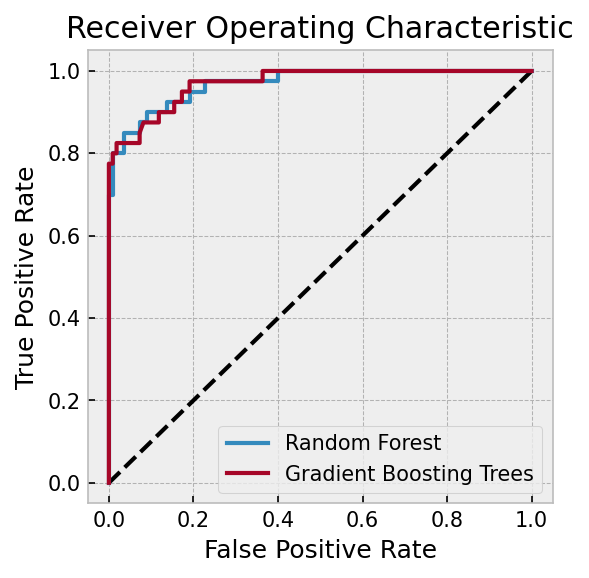

In [43]:
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_true = y_test, y_score = y_predicted_score_rfc)
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_true = y_test, y_score = y_predicted_score_gbc)

with plt.style.context('bmh'):
    plt.figure(figsize = (4, 4), dpi = 150)
    plt.plot([0,1],[0,1], 'k--')
    plt.plot(rf_fpr, rf_tpr, label= "Random Forest")
    plt.plot(gb_fpr, gb_tpr, label= "Gradient Boosting Trees")
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title('Receiver Operating Characteristic')
    plt.show()

AUC

In [44]:
from sklearn.metrics import auc

In [45]:
print(auc(rf_fpr, rf_tpr), auc(gb_fpr, gb_tpr))

0.9693181818181817 0.9705681818181818


### Variablenwichtigkeit

Random Forest

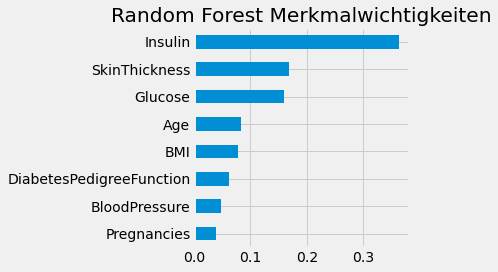

In [46]:
feature_names = X_train.columns

mdi_importances1 = pd.Series(
    rfc_eval.feature_importances_, index=feature_names
).sort_values(ascending=True)
with plt.style.context('fivethirtyeight'):
    ax1 = mdi_importances1.plot.barh()
    ax1.set_title("Random Forest Merkmalwichtigkeiten")
    ax1.figure.tight_layout()

Gradient Boosting Tree

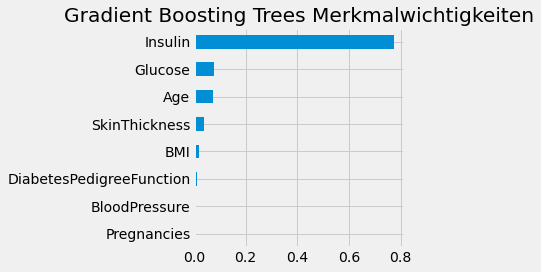

In [47]:
mdi_importances2 = pd.Series(
    gbc_eval.feature_importances_, index=feature_names
).sort_values(ascending=True)
with plt.style.context('fivethirtyeight'):
    ax2 = mdi_importances2.plot.barh()
    ax2.set_title("Gradient Boosting Trees Merkmalwichtigkeiten")
    ax2.figure.tight_layout()